# Singular Value Decomposition

Surely you still remember a type of problem that is done a lot when learning Linear Algebra: Matrix diagonalization problem. That problem says: A square matrix $A \in \mathbb{R}^{n \times n}$ is called diagonalizable if exist a diag matrix $D$ and inverse matrix $P$ so that:

$$A = PDP^{-1}$$

The number of elements not equal to zero are diag matrix $D$ equal to rank $A$

Multiply both side with $P$ we have:

$$AP = PD$$

Call $p_i$, $d_i$ are the column $i$ of matrix $P$ and $D$ respectively. Because each columns of the left side and right side of the equation above must be the same, so we had:

$$Ap_i = Pd_i = d_{ii}p_i$$

with $d_{ii}$ is the element $i$ of $p_i$

The second equal sign happen because $D$ is the diag matrix, thus $d_i$ only have $d_{ii} \neq 0$. And if you still remember, the equation showed that each $d_{ii}$ must be a eigenvalue of $A$ and each columns vector of $p_i$ are eigenvector of $A$ corresponding with a eigenvalue $d_{ii}$

The factorization of a square matrix is also known as the ***Eigen Decomposition***

An important point is that the decomposition only applies to square matrices and does not always exist. It only exists if the matrix $A$ has $n$ eigenvector linear independent, otherwise there would be no inverse matrix $P$. Furthermore, this analysis is also not unique because if $P$, $D$ satisfy then $kP$, $D$ also satisfy with $k$ is a constant ($\neq 0$)

Factoring a matrix into a product of many other special matrices (Matrix Factorization or Matrix Decomposition) brings many important benefits that you will see: reducing the dimensionality of data, compressing data, understanding the characteristics of data, solving systems of linear equations, clustering, and many other applications.

In this notebook, I will introduce to you one of the beautiful Matrix Factorization methods of Linear Algebra. That method is called Singular Value Decomposition (SVD). You will see that any matrix, not necessarily square, can be factored into the product of three special matrices.

# Linear Algebra

### Eigenvalue & Eigenvector

Given a square matrix $A \in \mathbb{R}^{n \times n}$, if a scalar number $\lambda$ and vector $x \neq 0 \in \mathbb{R}^n$ satisfy:

$$Ax = \lambda x$$

Then $\lambda$ is called a eigenvalue of $A$ and $x$ is called eigenvector corresponding to that eigenvalue.

Some properties:
- If $x$ is a eigenvector of $A$ corresponds to $\lambda$ then $kx, k \neq 0$ must be eigenvector with that eigenvalue
- Every rank-$n$ square matrix has $n$ eigenvalue (including repetitions) and can be complex numbers
- For a symmetric matrix, all the eigenvalues ​​are real numbers
- For a positive definite matrix, all its eigenvalues ​​are positive real numbers. For a positive semidefinite matrix, all its eigenvalues ​​are non-negative real numbers.

The last property can be derived from the definition of a positive (semi)definite matrix. Indeed, let $u \neq 0$ is eigenvector corresponds to $\lambda$ eigenvalue of matrix $A$ positive definite, we have:

$$Au = \lambda u \rightarrow u^TAu = \lambda u^Tu = \lambda \|u\|_{2}^2$$

Because $A$ is half positive definite then with every $u \neq 0: u^TAu \geq 0$ then $\|u\|_{2}^2 > 0$. Which $\lambda$ is not negative

### Orthogonal and orthonormal systems

A basis $u_1, u_2, \cdots, u_m \in \mathbb{R}^m$ is called orthogonal if each vector $\neq 0$ and product of two any vector $= 0$:

$$u_j \neq 0; u_{i}^Tu_j = 0 \forall 1 \leq i \neq j \leq m$$

A basis $u_1, u_2, \cdots, u_m \in \mathbb{R}^m$ is called orthonormal if it is an orthogonal system and the Euclidean length (norm 2) of each vector is equal to 1:

$$u_{i}^Tu_j = \begin{cases}
1 \text{ if } i = j \\
0 \text{ otherwise}
\end{cases}
$$

Call $U = [u_1, u_2, \cdots, u_m]$ with $u_1, u_2, \cdots, u_m \in \mathbb{R}^m$ are orthonormal, then we have:

$$UU^T = U^TU = I$$

Where $I$ is identity matrix rank-$m$. We call $U$ is orthogonal matrix. This type of matrix is ​​not called orthonormal matrix, there is no definition for orthonormal matrix.

Some properties:
- $U^{-1} = U^T$: The inverse of an orthogonal matrix is ​​its transpose.
- If $U$ is an orthogonal matrix then its transpose $U^T$ is also an orthogonal matrix.
- The determinant of an orthogonal matrix is ​​equal to $1$ or $-1$. This can be concluded from: $\det(U) = \det(U^T)$ and $\det(U)\det(U^T) = \det(I) = 1$
- Orthogonal matrix represents rotation of a vector.
- Assume $\hat{U} \in \mathbb{R}^{m \times r}, r < m$ is a submatrix of the orthogonal matrix $U$ created by $r$ columns of $U$, we have $\hat{U}^T \hat{U} = I_r$

# SVD

Because in this section we need to understand the dimensions of each matrix, I will change the notation a bit to make it easier for us to visualize. We will denote a matrix with its number of dimensions, for example $A_{m \times n}$ mean $A \in \mathbb{R}^{m \times n}$

### SVD Statement

A matrix $A_{m \times n}$ any can be analyzed in the form:

$$A_{m \times n} = U_{m \times m} \Sigma{m \times n} (V_{n \times n}^T)

Where $U$, $V$ are orthogonal matrix, $\Sigma$ is the diagonal matrix ​not square with elements on the diagonal $\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_r \geq 0 = 0 = \cdots = 0$ and $r$ are rank of matrix $A$.

Note that $\Sigma$ not a square matrix, we can still consider it a diagonal matrix if its other components are not only located on the diagonal, but at positions with the same number of rows and columns.

The number of non-zero elements in $\Sigma$ is the rank of matrix $A$

The representation of SVD above is not the only one because if we changing the sign of $U$ and $V$ then it still satisfy.

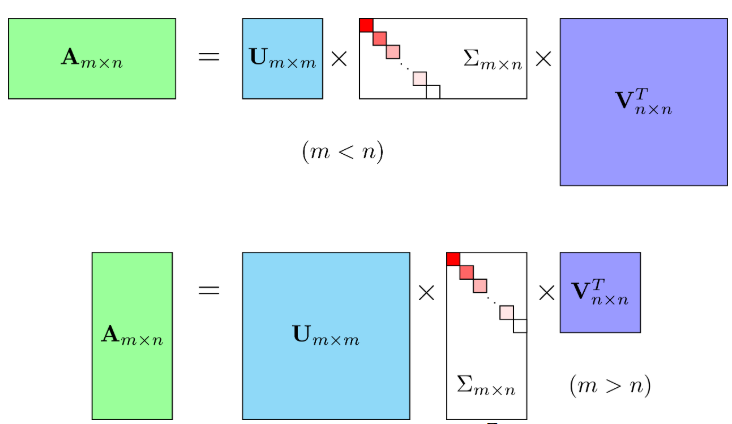

- The first one happen when $m < n$, second one is $m > n$.
- $\Sigma$ is a diag matrix where the value go from high to low (no negative)
- The white cell represent for a 0.

### Origin of the name Singular Value Decomposition 

Skip the dimension of a matrix, from the SVD formula above we have:

$$\begin{align*}
AA^T &= U\Sigma V^T (U\Sigma V^T)^T\\
&= U\Sigma V^T V \Sigma^T U^T \\
&= U\Sigma \Sigma^T U^T\\
&= U\Sigma \Sigma^T U^{-1}
\end{align*}
$$

The last equation happen because $V^TV = I$ (V is orthogonal matrix)

We can see that $\Sigma \Sigma^T$ is a diag matrix with every element on the diag $\sigma_{1}^2, \sigma_{2}^2, \cdots$. Then that last equation is Eigen Decomposition of $AA^T$. Further more $\sigma_{1}^2, \sigma_{2}^2, \cdots$ are eigenvalue of $AA^T$.

Matrix $AA^T$ is always a positive semidefinite matrix, so its eigenvalues ​​are not negative. The $\sigma_i$ are two separate levels of values $AA^T$ also called **singular values** of $A$. The name Singular Value Decomposition comes from here.

Accordingly, each column of $U$ is an eigenvector of $AA^T$ we call each of these columns **left-singular vectors** of $A$. Likewise, we have $A^TA = V\Sigma^T \Sigma V^T$ and every columns of $V$ also known as **right-singular vectors** of $A$.

### Compact SVD

We can rewrite SVD under the sum of each rank 1 matrix:

$$A = \sigma_1u_1v_1^T + \sigma_2u_2v_2^T + \cdots + \sigma_ru_rv_r^T$$

It is clear in this representation that the matrix $A$ just depends on $r$ first column of $U$, $V$ and $r$ non-zero value on the diagonal of the matrix $\Sigma$. Therefore, we have a more compact way of analysis called compact SVD:

$$A = U_r\Sigma_r(V_r)^T$$

With $U_r$, $V_r$ are the matrices created by $r$ first column of $U$ and $V$, respectively. $\Sigma_r$ is the submatrix created by $r$ first row and $r$ first column of $\Sigma$. If matrix $A$ has a rank much smaller than the number of rows and columns $r \ll m, n$, we will benefit a lot from storage.

An example where $m = 4$, $n = 6$, $r = 2$:

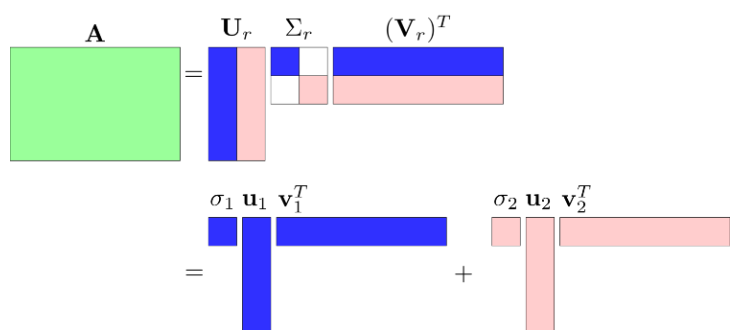

### Truncated SVD - Low-rank Approximation

Notice that in matrix $\Sigma$, the values ​​on the diagonal are non-negative and decreasing $\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_r \geq 0 = 0 = \cdots = 0$. Usually, only a small amount of these $\sigma_i$ has a large value, the remaining values ​​are usually small and close to 0. Then we can approximate the matrix $A$ by sum of $k < r$ matrix rank of 1:

$$A \approx A_k = U_k\Sigma_k(V_k)^T = \sigma_1u_1v_1^T + \sigma_2u_2v_2^T + \cdots + \sigma_ku_kv_k^T$$

Here is an interesting theorem (Eckart-Young). It says that the error due to the above approximation is the square root of the sum of the squares of the singular values ​​that we ignored at the end of the $\Sigma$. Here the error is defined as the Frobineous norm of the difference of two matrices:

$$\|A - A_k\|_F^2 = \sum_{i = k + 1}^r \sigma_i^2$$

To prove this, we use: $\|X\|_F^2 = \text{trace}(XX^T)$ and $\text{trace}(XY) = \text{trace}(YX)$ with every X, Y matrix:

$$\begin{align*}
\|A - A_k\|_F^2 &= \|\sum_{i = k +1}^r \sigma_i u_i v_i^T\|_f^2 \\
&= \text{trace}((\sum_{i = k +1}^r \sigma_i u_i v_i^T)(\sum_{j = k +1}^r \sigma_j u_j v_j^T)^T) \\
&= \text{trace}(\sum_{i = k + 1}^r \sum_{j = k + 1}^r \sigma_i \sigma_j u_i v_i^T v_j u_j^T) \\
&= \text{trace}(\sum_{i = k + 1}^r \sigma_i^2 u_i u_i^T) \\
&= \text{trace}(\sum_{i = k + 1}^r \sigma_i^2 u_i^T u_i) \\
&= \text{trace}(\sum_{i = k + 1}^r \sigma_i^2) \\
&= \sum_{i = k + 1}^r \sigma_i^2
\end{align*}
$$

From equation number 4 to 7, we can prove it by using properties of orthogonal matrix, trace with commutative property and scalar. 

Set $k = 0$ we have:

$$\|A\|_F^2 = \sum_{i = 1}^r \sigma_i^2$$

From there we can say:

$$\frac{\|A - A_k\|_F^2}{\|A\|_F^2} = \frac{\sum_{i = k + 1}^r \sigma_i^2}{\sum_{j = 1}^r \sigma_j^2}

Thus, the approximation error is smaller if the truncated singular values ​​are smaller than the retained singular values. This is an important theorem that helps determine the matrix approximation based on the amount of information to be retained.

For example, if we want to retain at least 90% of the information in $A$, first we calculate $\sum_{j = 1}^r \sigma_j^2$, then choose $k$ is the smallest number such that:

$$\frac{\sum_{i = 1}^k \sigma_i^2}{\sum_{j = 1}^r \sigma_j^2} \geq 0.9$$

When $k$ is small, matrix $A_k$ has rank $k$, is a matrix with low rank. Therefore, Truncated SVD is also considered a **Low-rank approximation** method.

### Best Rank $k$ Approximation

It has been proven that (Singular Value Decomposition - Princeton) $A_k$ is the solution to the optimization problem:

$$\min_B \|A - B\|_F \\
\text{s.t. rank}(B) = k$$

and as demonstrated above: $\|A - A_k\|_F^2 = \sum_{i = k + 1}^r \sigma_i^2$

If we use norm 2 of the matrix instead of Frobenius norm to measure the error,$A_k$ will also be a solution of the optimization problem:

$$\|A\|_2 = \max_{\|x\|_2 = 1}\|Ax\|_2$$

This is why the square root of the sum of squares of the elements of a matrix is ​​not called norm 2 as it is for a vector.

If you want to know more:

$$\|A\|_2 = \sigma_1$$

Thus, norm 2 of a matrix is ​​the largest singular value of that matrix.

Frobenius norm and norm 2 are the two most commonly used norms in matrices. Thus, considering both of these norms, Truncated SVD gives the best approximation. Therefore, Truncated SVD is also called **Best low-rank Approximation**.

# Some application of SVD

### Image Compression

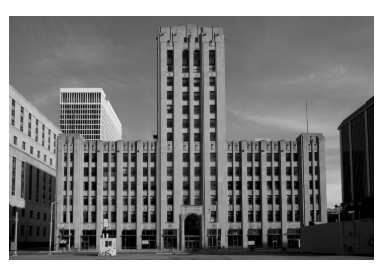

The original image in gray color, a matrix $960 \times 1440$

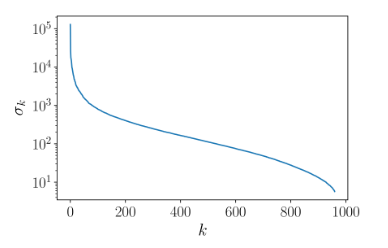

The values ​​of the singular values ​​of the image matrix in logscale. It can be seen that the singular values ​​decrease rapidly at $k = 200$

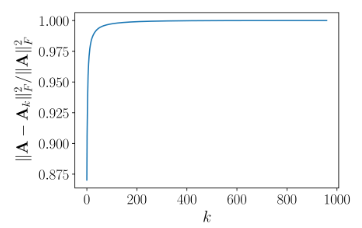

Represents the amount of information retained when selecting different $k$. It can be seen from about $k = 200$ , the amount of information retained is close to 1. So we can approximate this image matrix with a matrix of smaller rank.

![best-k](..\assest\img_compress.gif)

To save an image with Truncated SVD, we will save the matrices $U_k \in \mathbb{R}^{m \times k}$, $\Sigma_k \in \mathbb{R}^{k \times k}$, $V_k \in \mathbb{R}^{n \times k}$. The total number of elements to be stored is $k(m + n + 1)$ with the note that we only need to store the values ​​on the diagonal of $\Sigma_k$. Assuming each element is stored as a 4-byte real number, then the number of bytes needed to be stored is $4k(m + n + 1)$. If we compare this value with the original image of size $mn$, each value is a 1 byte integer, the compression ratio is:

$$\frac{4k(m + n + 1)}{mn}$$

When $k \ll m, n$, we get a ratio less than 1. In our example $m = 960$, $n = 1440$, $k = 100$, we have a compression ratio of approximately $0.69$, which means about $30%$ memory savings.

### Truncated SVD cho Recommendation System

As mentioned in the first section, SVD is a Matrix Factorization method, so it can also be applied to the Recommendation Systems problem.

The idea is exactly the same, we will approximate the normalized Utility Matrix (either user-based or item-based). The value of the approximation matrix with the lower rank is the predicted value.